<a href="https://colab.research.google.com/github/sivagami-murugesan/sivagami-murugesan.github.io/blob/BA_Python/BA_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt


base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 380
page_size = 10

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
       reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 10 total reviews
Scraping page 2
   ---> 20 total reviews
Scraping page 3
   ---> 30 total reviews
Scraping page 4
   ---> 40 total reviews
Scraping page 5
   ---> 50 total reviews
Scraping page 6
   ---> 60 total reviews
Scraping page 7
   ---> 70 total reviews
Scraping page 8
   ---> 80 total reviews
Scraping page 9
   ---> 90 total reviews
Scraping page 10
   ---> 100 total reviews
Scraping page 11
   ---> 110 total reviews
Scraping page 12
   ---> 120 total reviews
Scraping page 13
   ---> 130 total reviews
Scraping page 14
   ---> 140 total reviews
Scraping page 15
   ---> 150 total reviews
Scraping page 16
   ---> 160 total reviews
Scraping page 17
   ---> 170 total reviews
Scraping page 18
   ---> 180 total reviews
Scraping page 19
   ---> 190 total reviews
Scraping page 20
   ---> 200 total reviews
Scraping page 21
   ---> 210 total reviews
Scraping page 22
   ---> 220 total reviews
Scraping page 23
   ---> 230 total reviews
Scraping page 24
   ---> 240 

In [2]:
df = pd.DataFrame()
df["reviews"] = reviews

df.to_csv("BA_reviews.csv")

In [3]:
reviews = pd.read_csv("BA_reviews.csv")
#reviews = reviews.pop("reviews")
reviews

,Unnamed: 0,reviews
0,0,✅ Trip Verified | You may never see your ref...
1,1,Not Verified | Cargo service: that's how I fel...
2,2,✅ Trip Verified | Inefficient and slow airport...
3,3,Not Verified | The customer service is one of...
4,4,"Not Verified | Before my flight, I was forced ..."
...,...,...
3795,3795,Recently for our honeymoon we took advantage o...
3796,3796,LGW-Antigua on 29 April and Antigua-LGW on 13 ...
3797,3797,LHR-JTR-LHR. A tale of opposites for BA's new ...
3798,3798,Gatwick-Venice return. Two contrasting experie...


In [4]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
print(STOPWORDS)

frozenset({'my', 'him', 'indeed', 'whoever', 'only', 'whom', 'either', 'nowhere', 'ever', 'at', 'when', 'everywhere', 'over', 'nobody', 'this', 'in', 'thereafter', 'thence', 'had', 'eleven', 'often', 'whereby', 'most', 'some', 'she', 'and', 'amount', 'do', 'nothing', 'fire', 'least', 'upon', 'front', 'eight', 'con', 'interest', 'always', 'see', 'once', 'ten', 'used', 'move', 'all', 'fill', 'against', 'top', 'hereupon', 'since', 'were', 'meanwhile', 'yourselves', 'whereafter', 'sometime', 'somewhere', 'nevertheless', 'he', 'last', 'someone', 'a', 'besides', 'whole', 'system', 'whether', 'ltd', 'five', 'under', 'out', 'anyhow', 'found', 'along', 'twenty', 'yet', 'hers', 'ie', 'but', 'whenever', 'amongst', 'doesn', 'next', 'after', 'through', 'couldnt', 'enough', 'from', 'its', 'made', 'because', 'became', 'without', 'never', 'various', 'third', 'whence', 'find', 'no', 'cant', 'except', 'becoming', 'itself', 'again', 'must', 'below', 'perhaps', 'fifteen', 'if', 'don', 'former', 'about', '

In [5]:
#Removing Stopwords
test = pd.DataFrame(reviews)
test.columns = ["0","reviews"]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['reviews_ws'] = test['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
print(test)


         0                                            reviews  \
0        0  ✅ Trip Verified |   You may never see your ref...   
1        1  Not Verified | Cargo service: that's how I fel...   
2        2  ✅ Trip Verified | Inefficient and slow airport...   
3        3  Not Verified |  The customer service is one of...   
4        4  Not Verified | Before my flight, I was forced ...   
...    ...                                                ...   
3795  3795  Recently for our honeymoon we took advantage o...   
3796  3796  LGW-Antigua on 29 April and Antigua-LGW on 13 ...   
3797  3797  LHR-JTR-LHR. A tale of opposites for BA's new ...   
3798  3798  Gatwick-Venice return. Two contrasting experie...   
3799  3799  1st Class LHR-PHX. Totally seamless flight. Gr...   

                                             reviews_ws  
0     ✅ Trip Verified | You refund. I cancelled retu...  
1     Not Verified | Cargo service: that's I felt A3...  
2     ✅ Trip Verified | Inefficient slow airp

In [13]:
test


,0,reviews,reviews_ws
0,0,✅ Trip Verified | You may never see your ref...,✅ Trip Verified | You refund. I cancelled retu...
1,1,Not Verified | Cargo service: that's how I fel...,Not Verified | Cargo service: that's I felt A3...
2,2,✅ Trip Verified | Inefficient and slow airport...,✅ Trip Verified | Inefficient slow airport ope...
3,3,Not Verified | The customer service is one of...,Not Verified | The customer service worst I se...
4,4,"Not Verified | Before my flight, I was forced ...","Not Verified | Before flight, I forced ground ..."
...,...,...,...
3795,3795,Recently for our honeymoon we took advantage o...,Recently honeymoon took advantage BA promo fly...
3796,3796,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,LGW-Antigua 29 April Antigua-LGW 13 May Boeing...
3797,3797,LHR-JTR-LHR. A tale of opposites for BA's new ...,LHR-JTR-LHR. A tale opposites BA's new route S...
3798,3798,Gatwick-Venice return. Two contrasting experie...,Gatwick-Venice return. Two contrasting experie...


In [18]:
reviews=test.pop('reviews_ws')
reviews

,reviews_ws
0,✅ Trip Verified | You refund. I cancelled retu...
1,Not Verified | Cargo service: that's I felt A3...
2,✅ Trip Verified | Inefficient slow airport ope...
3,Not Verified | The customer service worst I se...
4,"Not Verified | Before flight, I forced ground ..."
...,...
3795,Recently honeymoon took advantage BA promo fly...
3796,LGW-Antigua 29 April Antigua-LGW 13 May Boeing...
3797,LHR-JTR-LHR. A tale opposites BA's new route S...
3798,Gatwick-Venice return. Two contrasting experie...


In [19]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

reviews = reviews.str.replace('Trip Verified |', '')
reviews = reviews.str.replace('✅', '')
reviews = reviews.str.replace('|', '')
reviews = reviews.str.replace(r'\b(\w{1,3})\b', '')
reviews = reviews.apply(remove_punctuations)
reviews

,reviews_ws
0,You refund I cancelled return flight sent re...
1,Not Verified Cargo service thats I felt A380 ...
2,Inefficient slow airport operation Resting l...
3,Not Verified The customer service worst I see...
4,Not Verified Before flight I forced ground st...
...,...
3795,Recently honeymoon took advantage BA promo fly...
3796,LGWAntigua 29 April AntiguaLGW 13 May Boeing 7...
3797,LHRJTRLHR A tale opposites BAs new route Santo...
3798,GatwickVenice return Two contrasting experienc...


In [20]:
#Frequency of words in the reviews
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

,count
i,11212
flight,6851
the,4987
ba,4733
service,2920
seat,2428
food,2370
british,2225
london,2218
crew,2216


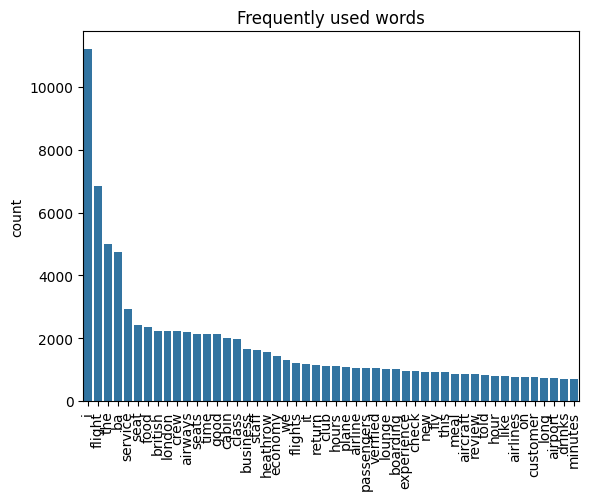

In [23]:
#Plot showing the frequency of most used words in the review
sns.barplot(data = freq_words)
plt.xticks(rotation=90)
plt.title("Frequently used words")
plt.show()